# Card analyzing

##  필요한 라이브러리 가져오기

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## 시각화를 위한 폰트 조절(폰트 깨짐 방지 및 window환경 font 조정)¶

In [3]:
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline

## 글씨를 선명하게 보기 위한 retina 설정

In [4]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

## 데이터 로드 및 요약

In [5]:
card = pd.read_csv("card.csv", parse_dates=["receipt_dttm"])

In [6]:
card.shape

(3777647, 7)

In [7]:
card.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,2020-01-04,1174066000,성내3동,7041,약국,463,5843230
1,2020-01-04,1174066000,성내3동,7022,치과의원,33,7835550
2,2020-01-04,1174066000,성내3동,7021,한의원,53,4589800
3,2020-01-04,1174066000,성내3동,7020,의원,339,9267240
4,2020-01-04,1174066000,성내3동,6110,자동차정비,19,4441000


In [8]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777647 entries, 0 to 3777646
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   receipt_dttm          datetime64[ns]
 1   adstrd_code           int64         
 2   adstrd_nm             object        
 3   mrhst_induty_cl_code  int64         
 4   mrhst_induty_cl_nm    object        
 5   selng_cascnt          object        
 6   salamt                object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 201.7+ MB


In [9]:
card.columns

Index(['receipt_dttm', 'adstrd_code', 'adstrd_nm', 'mrhst_induty_cl_code',
       'mrhst_induty_cl_nm', 'selng_cascnt', 'salamt'],
      dtype='object')

## 결측치수

In [10]:
card.isnull()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3777642,False,False,False,False,False,False,False
3777643,False,False,False,False,False,False,False
3777644,False,False,False,False,False,False,False
3777645,False,False,False,False,False,False,False


In [11]:
null_count = card.isnull().sum()
null_count

receipt_dttm            0
adstrd_code             0
adstrd_nm               0
mrhst_induty_cl_code    0
mrhst_induty_cl_nm      0
selng_cascnt            0
salamt                  0
dtype: int64

In [12]:
null_count.reset_index()
card_null_count = null_count.reset_index()
card_null_count

,index,0
0,receipt_dttm,0
1,adstrd_code,0
2,adstrd_nm,0
3,mrhst_induty_cl_code,0
4,mrhst_induty_cl_nm,0
5,selng_cascnt,0
6,salamt,0


### 결측치수 모두 0

In [13]:
card_null_count.columns = ['컬럼명','결측치수']
card_null_count

,컬럼명,결측치수
0,receipt_dttm,0
1,adstrd_code,0
2,adstrd_nm,0
3,mrhst_induty_cl_code,0
4,mrhst_induty_cl_nm,0
5,selng_cascnt,0
6,salamt,0


## 가장 많이 다닌 동네: 신사동, 가장 많이 간 장소: 일반한식점

In [14]:
card.describe(include = 'object')

,adstrd_nm,mrhst_induty_cl_nm,selng_cascnt,salamt
count,3777647,3777647,3777647,3777647
unique,424,265,12150,756953
top,신사동,일반한식,1,철물
freq,23650,65528,641598,34937


## 코로나 확진 추이

In [85]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
import math
from datetime import date, timedelta

%matplotlib inline
from matplotlib import font_manager, rc

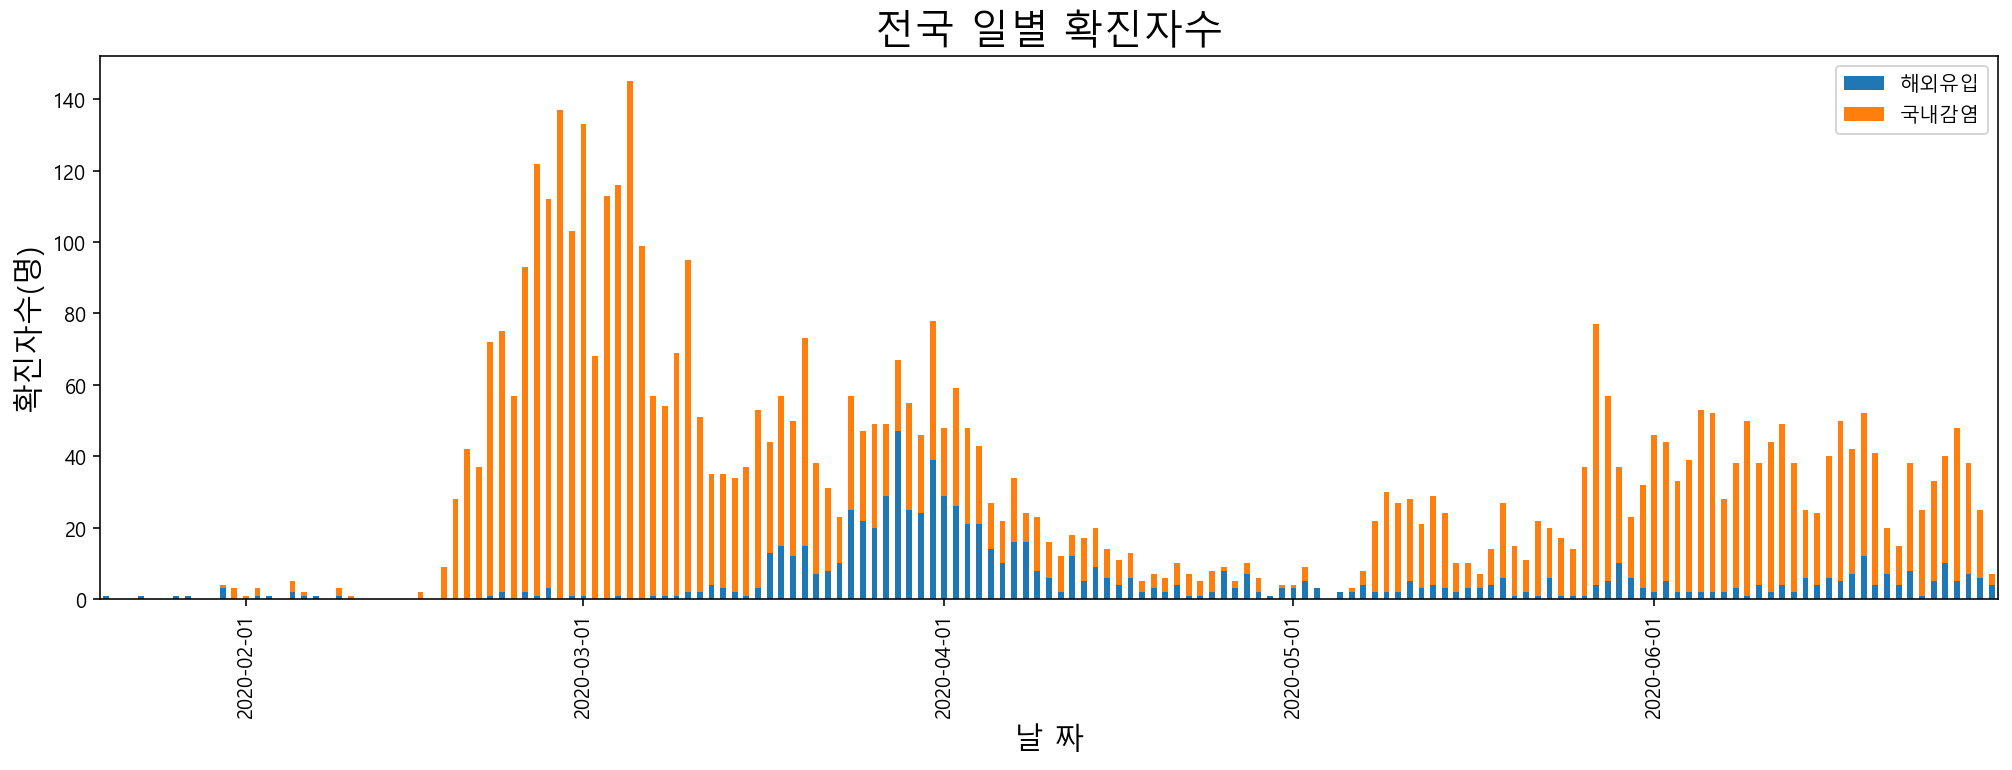

In [86]:
#확진자수 - 국내, 해외유입 구분
patients = pd.read_csv('PatientInfo.csv')
overseas = list()
for index, row in patients.iterrows():
    overseas.append('Yes') if row['infection_case'] == 'overseas inflow' else overseas.append("No")
patients['overseas'] = overseas

patients = patients.groupby(['confirmed_date','overseas']).patient_id.count().to_frame('confirmed_count')
start_date = date(2020,1,20)
end_date = date(2020,6,29)
delta = timedelta(days=1)
date = start_date
while date <= end_date:
    find = date.strftime("%Y-%m-%d")
    if (find, 'Yes') not in patients.index:
        patients.loc[(find, 'Yes'),] = 0
    if (find, 'No') not in patients.index:
        patients.loc[(find, 'No'),] = 0
    date += delta

patients = patients.sort_index()
patients = patients.unstack(level=-1)
patients = patients.reindex(columns=[('confirmed_count', 'Yes'),('confirmed_count', 'No')])
xlabel = ["2020-02-01","2020-03-01","2020-04-01","2020-05-01","2020-06-01"]

def find_loc(df, dates):
    marks = []
    for date in dates:
        marks.append(df.index.get_loc(date))
    return marks

ax = patients.plot(kind='bar', stacked=True, figsize=(17,5))
ax.xaxis.set_ticks(find_loc(patients,xlabel))
ax.xaxis.set_ticklabels(xlabel)
ax.set_title('전국 일별 확진자수', fontsize=20)
ax.set_xlabel('날 짜', fontsize=15)
ax.set_ylabel('확진자수(명)', fontsize=15);
ax.legend(['해외유입','국내감염']);

## 장소; mrhst_induty_cl_nm

### 중복제거한 값

In [15]:
card['mrhst_induty_cl_nm'].unique()

array(['약국', '치과의원', '한의원', '의원', '자동차정비', '기타 교육', '보습학원', '일반 서적', '정장',
       '슈퍼 마켓', '편 의 점', '기타레져업', '노래방', '당구장', '헬스 크럽', '스포츠레져용품',
       '기계 공구', '기타건축자재', '기타음료식품', '농축수산품', '정 육 점', '제과점', '스넥', '주점',
       '서양음식', '중국음식', '일식회집', '일반한식', '화 장 품', '미 용 원', '주 차 장', '화   원',
       '비 영 리', '레져업소(회원제형태)', '예체능학원', '문구용 품', '사진관', '단란주점', '악세 사리',
       '기타숙박업', '세탁소', '유흥주점', '안경', '유아원', '기타잡화', '인터넷종합Mall', '대형할인점',
       '애완 동물', '학원(회원제형태)', '사무서비스', '독서실', '외국어학원', '피부미용실',
       '자사카드발행백화점', '영화관', '신   발', '내의판매점', '목재', '칵테일바', '기타대인서비스',
       '동물병원', '사무통신기기수리', '기타사무용품', '통신 기기', '출판인쇄물', '가전 제품', '기타유통업',
       '농축수산가공품', '종합용역', '병원', '기타가구', '자동차부품', '주 유 소', '안마/스포츠마사지',
       '스크린골프', '의료 용품', '조세서비스(특약)', '조세서비스', '기타서적문구', '인터넷Mall',
       '인터넷P/G', '기타전문점', '기타회원제형태업소4', '가정용품수리', '법률회계서비스(법인)', '소프트웨어',
       '부동산중개/임대', '화물 운송', '혼례서비스', '기타건강식', '주류판매점', '위탁급식업', '사우나',
       '미용 재료', '컴퓨터학원', '기타의류', '상품권', '골프연습장', '골프 용품', '관광여행', '유류 판매

In [16]:
card['mrhst_induty_cl_nm'].nunique()

265

### 빈도수

In [17]:
card['mrhst_induty_cl_nm'].head()

0       약국
1     치과의원
2      한의원
3       의원
4    자동차정비
Name: mrhst_induty_cl_nm, dtype: object

In [18]:
place = card['mrhst_induty_cl_nm'].value_counts()
place

일반한식         65528
서양음식         65499
편 의 점        65160
스넥           65007
미 용 원        64073
             ...  
카지노              8
통신기기무이자할부        8
택시회사             4
P2P송금            2
중고자동차위탁판매        1
Name: mrhst_induty_cl_nm, Length: 265, dtype: int64

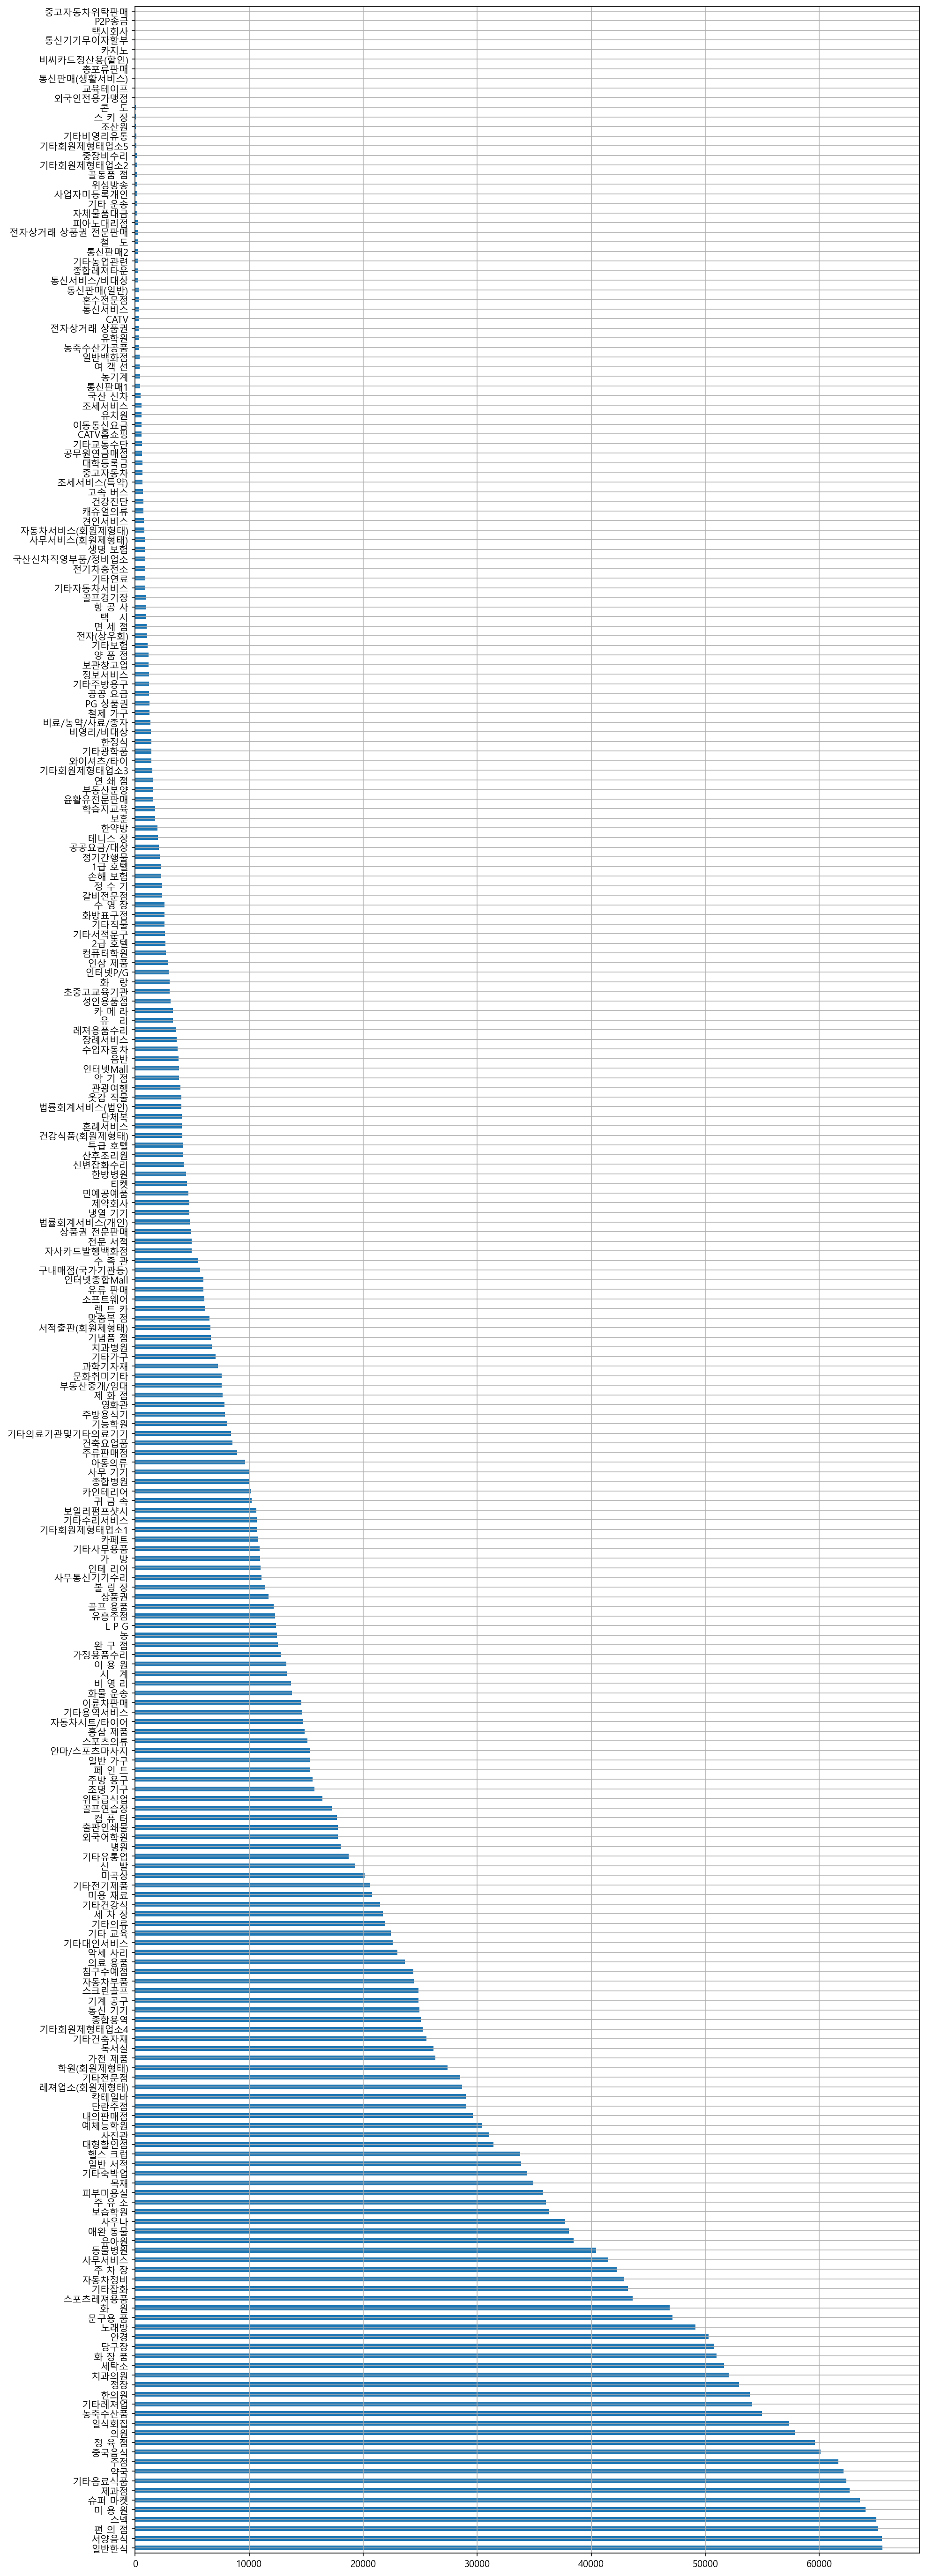

In [19]:
place.plot.barh(figsize=(15,50), grid = True)

## 매출발생건수 시각화 & 유형 분류

### 유형 분류

In [28]:
#각 유형 분류
card['mrhst_induty_cl_code']=card['mrhst_induty_cl_code'].astype(str)
card['유형']=card['mrhst_induty_cl_code'].str.get(i=0)
card.head()

,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,year,month,day,date,유형
0,1174066000,성내3동,7041,약국,463,5843230,2020,01,04,2020-01-04,7
1,1174066000,성내3동,7022,치과의원,33,7835550,2020,01,04,2020-01-04,7
2,1174066000,성내3동,7021,한의원,53,4589800,2020,01,04,2020-01-04,7
3,1174066000,성내3동,7020,의원,339,9267240,2020,01,04,2020-01-04,7
4,1174066000,성내3동,6110,자동차정비,19,4441000,2020,01,04,2020-01-04,6


In [29]:
card_yui1=card.loc[card['유형']=='1',:]
card_yui1['mrhst_induty_cl_nm'].unique()
card_yui1.head()
# 유형 1 : 관광 및 교통

,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,year,month,day,date,유형
86,1174062000,천호3동,1020,기타숙박업,16,668000,2020,01,04,2020-01-04,1
123,1174061000,천호2동,1020,기타숙박업,80,3327000,2020,01,04,2020-01-04,1
408,1171065000,잠실본동,1020,기타숙박업,81,4999800,2020,01,04,2020-01-04,1
759,1171056200,방이2동,1020,기타숙박업,124,4501400,2020,01,04,2020-01-04,1
1067,1168065000,역삼2동,1020,기타숙박업,86,16163585,2020,01,04,2020-01-04,1


In [30]:
card_yui2=card.loc[card['유형']=='2',:]
card_yui2['mrhst_induty_cl_nm'].unique()
# 유형 2 : 레져

array(['기타레져업', '노래방', '당구장', '헬스 크럽', '스포츠레져용품', '화   원', '애완 동물', '영화관',
       '스크린골프', '골프연습장', '골프 용품', '민예공예품', '악 기 점', '화방표구점', '음반',
       '수 족 관', '티켓', '화   랑', '문화취미기타', '테니스 장', '볼 링 장', '수 영 장',
       '종합레져타운', '골프경기장', '카지노', '스 키 장', '골동품 점', '피아노대리점', '총포류판매'],
      dtype=object)

In [31]:
card_yui3=card.loc[card['유형']=='3',:]
card_yui3['mrhst_induty_cl_nm'].unique()
# 유형 3 : 가전용품 및 연료

array(['사진관', '가전 제품', '기타가구', '주 유 소', '유류 판매', '기타전기제품', '일반 가구',
       '주방 용구', '주방용식기', '카 메 라', 'L P G', '냉열 기기', '기타광학품', '정 수 기',
       '철제 가구', '전기차충전소', '기타주방용구', '기타연료'], dtype=object)

In [32]:
card_yui4=card.loc[card['유형']=='4',:]
card_yui4['mrhst_induty_cl_nm'].unique()
# 유형 4 : 판매점 물품

array(['정장', '슈퍼 마켓', '편 의 점', '악세 사리', '기타잡화', '인터넷종합Mall', '대형할인점',
       '자사카드발행백화점', '신   발', '내의판매점', '기타유통업', '농축수산가공품', '인터넷Mall',
       '인터넷P/G', '기타의류', '상품권', '스포츠의류', '귀 금 속', '맞춤복 점', '가   방',
       'CATV홈쇼핑', '침구수예점', '구내매점(국가기관등)', '아동의류', '제 화 점', '기타직물', '카페트',
       '옷감 직물', '기념품 점', '상품권 전문판매', '전자상거래 상품권 전문판매', '보훈', '시   계',
       '성인용품점', 'PG 상품권', '면 세 점', '양 품 점', '농', '전자상거래 상품권', '통신판매1',
       '단체복', '연 쇄 점', '일반백화점', '공무원연금매점', '기타비영리유통', '와이셔츠/타이', '캐쥬얼의류',
       '통신판매2', '혼수전문점'], dtype=object)

In [33]:
card_yui5=card.loc[card['유형']=='5',:]
card_yui5['mrhst_induty_cl_nm'].unique()
# 유형 5 : 교육 및 서적

array(['기타 교육', '보습학원', '일반 서적', '예체능학원', '문구용 품', '유아원', '독서실', '외국어학원',
       '기타사무용품', '통신 기기', '출판인쇄물', '기타서적문구', '컴퓨터학원', '전자(상우회)', '컴 퓨 터',
       '완 구 점', '과학기자재', '기능학원', '전문 서적', '사무 기기', '유치원', '초중고교육기관',
       '학습지교육', '정기간행물', '유학원', '대학등록금', '교육테이프', '통신기기무이자할부'],
      dtype=object)

In [34]:
card_yui6=card.loc[card['유형']=='6',:]
card_yui6['mrhst_induty_cl_nm'].unique()
# 유형 6 : 보험 및 자동차

array(['자동차정비', '주 차 장', '자동차부품', '자동차시트/타이어', '윤활유전문판매', '세 차 장',
       '수입자동차', '이륜차판매', '손해 보험', '생명 보험', '카인테리어', '기타보험', '견인서비스',
       '국산 신차', '국산신차직영부품/정비업소', '기타자동차서비스', '중장비수리', '중고자동차', '기타 운송',
       '중고자동차위탁판매'], dtype=object)

In [35]:
card_yui7=card.loc[card['유형']=='7',:]
card_yui7['mrhst_induty_cl_nm'].unique()
# 유형 7 : 의료 용품 및 건강 

array(['약국', '치과의원', '한의원', '의원', '화 장 품', '미 용 원', '안경', '피부미용실',
       '기타대인서비스', '동물병원', '병원', '안마/스포츠마사지', '의료 용품', '사우나', '미용 재료',
       '종합병원', '이 용 원', '한약방', '기타의료기관및기타의료기기', '치과병원', '산후조리원', '한방병원',
       '제약회사', '건강진단', '조산원'], dtype=object)

In [36]:
card_yui8=card.loc[card['유형']=='8',:]
card_yui8['mrhst_induty_cl_nm'].unique()
# 유형 8 : 음식점

array(['기타음료식품', '농축수산품', '정 육 점', '제과점', '스넥', '주점', '서양음식', '중국음식',
       '일식회집', '일반한식', '단란주점', '유흥주점', '칵테일바', '기타건강식', '주류판매점', '위탁급식업',
       '홍삼 제품', '미곡상', '인삼 제품', '갈비전문점', '한정식'], dtype=object)

In [37]:
card_yui9=card.loc[card['유형']=='9',:]
card_yui9['mrhst_induty_cl_nm'].unique()
# 유형 9 : 기타

array(['기계 공구', '기타건축자재', '비 영 리', '레져업소(회원제형태)', '세탁소', '학원(회원제형태)',
       '사무서비스', '목재', '사무통신기기수리', '종합용역', '조세서비스(특약)', '조세서비스', '기타전문점',
       '기타회원제형태업소4', '가정용품수리', '법률회계서비스(법인)', '소프트웨어', '부동산중개/임대',
       '화물 운송', '혼례서비스', '건축요업품', '법률회계서비스(개인)', '기타용역서비스', '페 인 트',
       '보일러펌프샷시', '조명 기구', '인테 리어', '서적출판(회원제형태)', '비씨카드정산용(할인)',
       '기타수리서비스', '통신판매(일반)', '신변잡화수리', '비영리/비대상', '이동통신요금', '장례서비스',
       '기타회원제형태업소1', '보관창고업', '유   리', '건강식품(회원제형태)', '레져용품수리',
       '통신서비스/비대상', '공공요금/대상', '정보서비스', '통신서비스', '사무서비스(회원제형태)',
       '기타회원제형태업소3', '위성방송', '부동산분양', '사업자미등록개인', '농기계', '비료/농약/사료/종자',
       '공공 요금', '자동차서비스(회원제형태)', 'CATV', '외국인전용가맹점', '기타회원제형태업소5',
       '기타회원제형태업소2', '기타농업관련', '자체물품대금', '통신판매(생활서비스)', 'P2P송금'],
      dtype=object)

### 1월~6월 동안의 모든 분야의 매출건수

In [38]:
# 이상한 데이터 정리
card = card[(card['selng_cascnt']!='석재') & (card['selng_cascnt']!='영상물') & (card['selng_cascnt']!='축협직영매장') & (card['selng_cascnt']!='복지매장') & (card['selng_cascnt']!='커텐')]

In [39]:
card['selng_cascnt']=pd.to_numeric(card['selng_cascnt'])

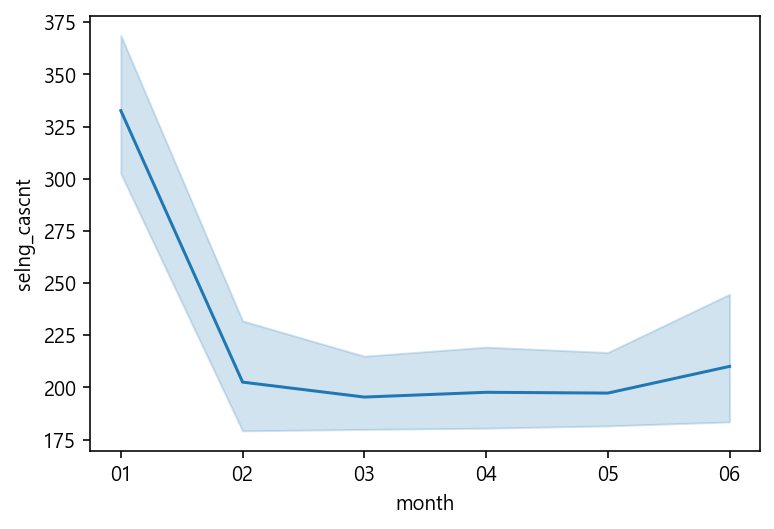

In [40]:
# lineplot 로 그리기
# 1월~6월 동안의 모든 분야의 매출건수
sns.lineplot(data= card, x='month', y='selng_cascnt')

### 1월~6월 동안의 유형별 매출건수

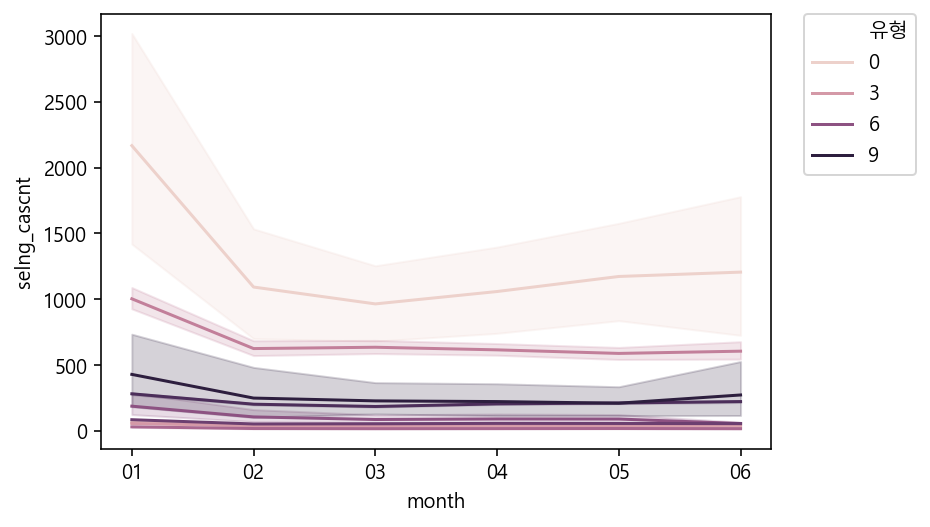

In [41]:
# 군별로 다른 색상 칠하기
sns.lineplot(data=card, x='month', y='selng_cascnt', hue='유형')
# legend 값을 바깥쪽으로 하기
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 선은 추정 회귀선, 선 주변에 색으로 표시된 면적이 신뢰구간이다

#### 영향을 많이 받은 유형: 1  영향을 적당히 받은 유형: 4, 6, 9 영향을 거의 받지 않은 유형: 2, 3, 5, 7, 8

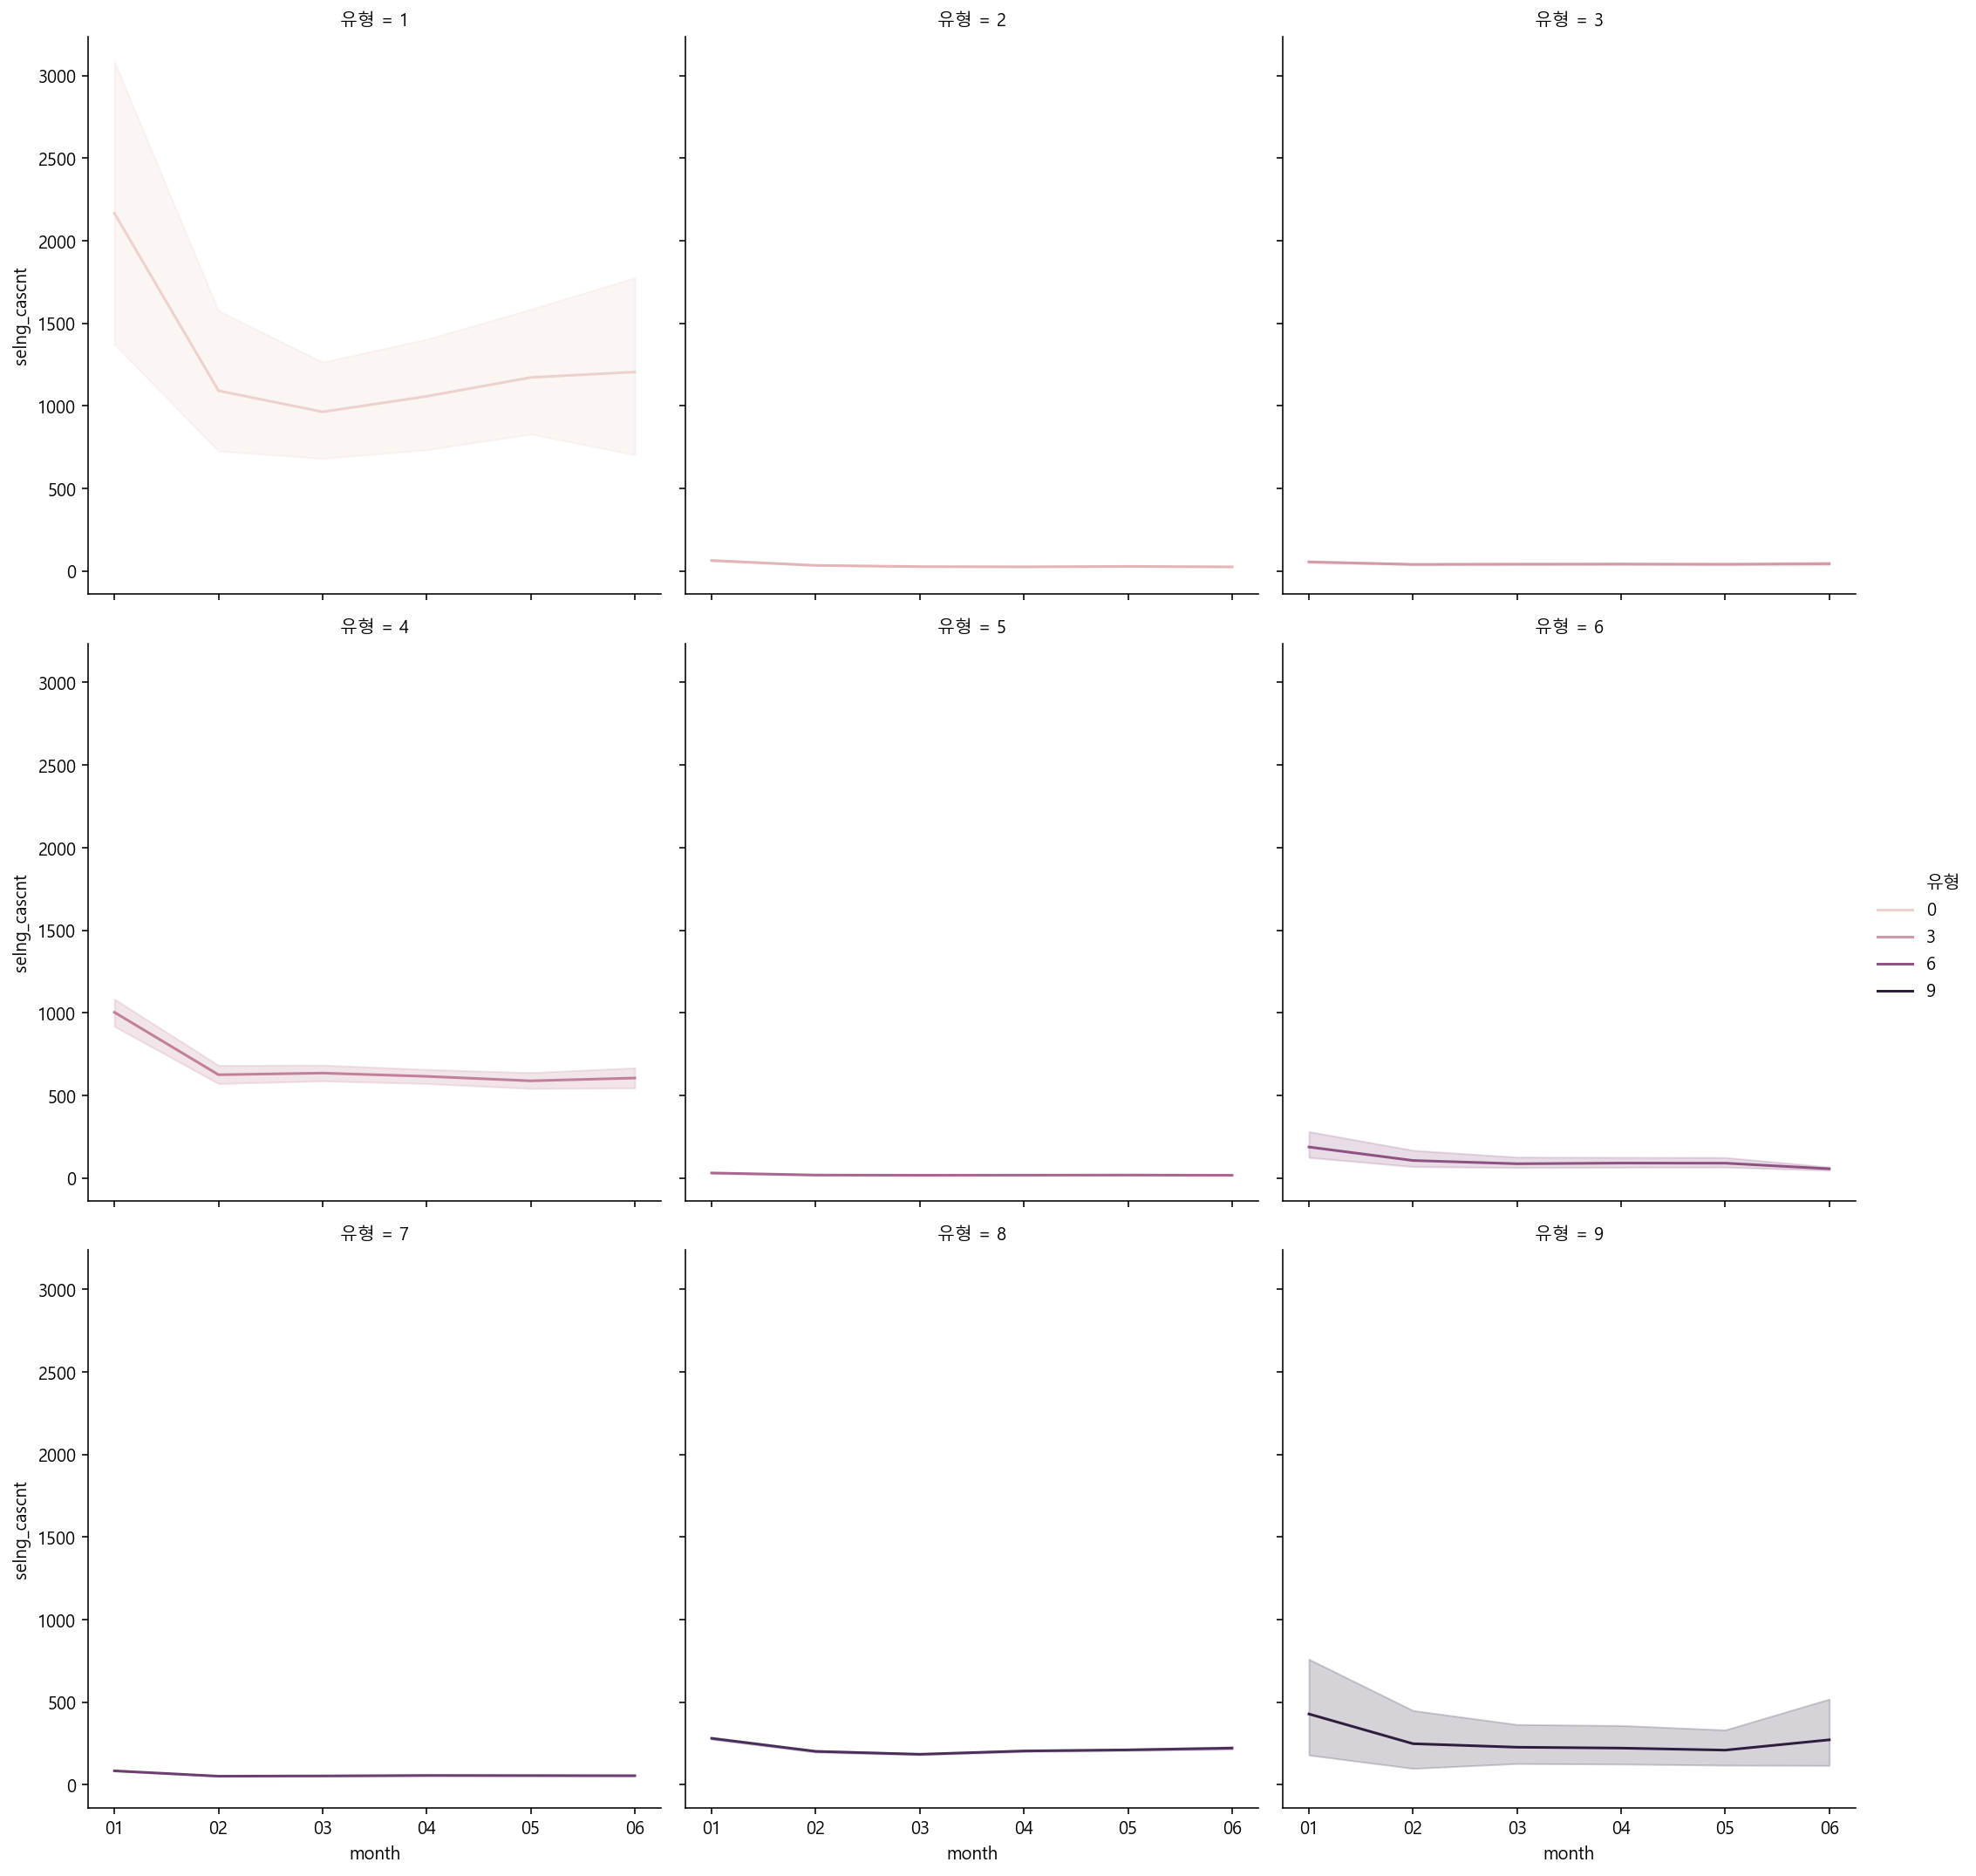

In [42]:
# 위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시
sns.relplot(data=card, x='month', y='selng_cascnt', hue='유형', kind='line', col='유형', col_wrap=3)

In [43]:
# 유형 1(관광 및 교통)의 값이 너무 커서 다른 값들을 제대로 알 수 없음
# isin 을 이용해 유형 1만 제외하고 card_sub 변수에 담자
# ~ 하면 그것만 빼고라는 뜻임
card_sub = card[~card['유형'].isin(['1'])].copy()

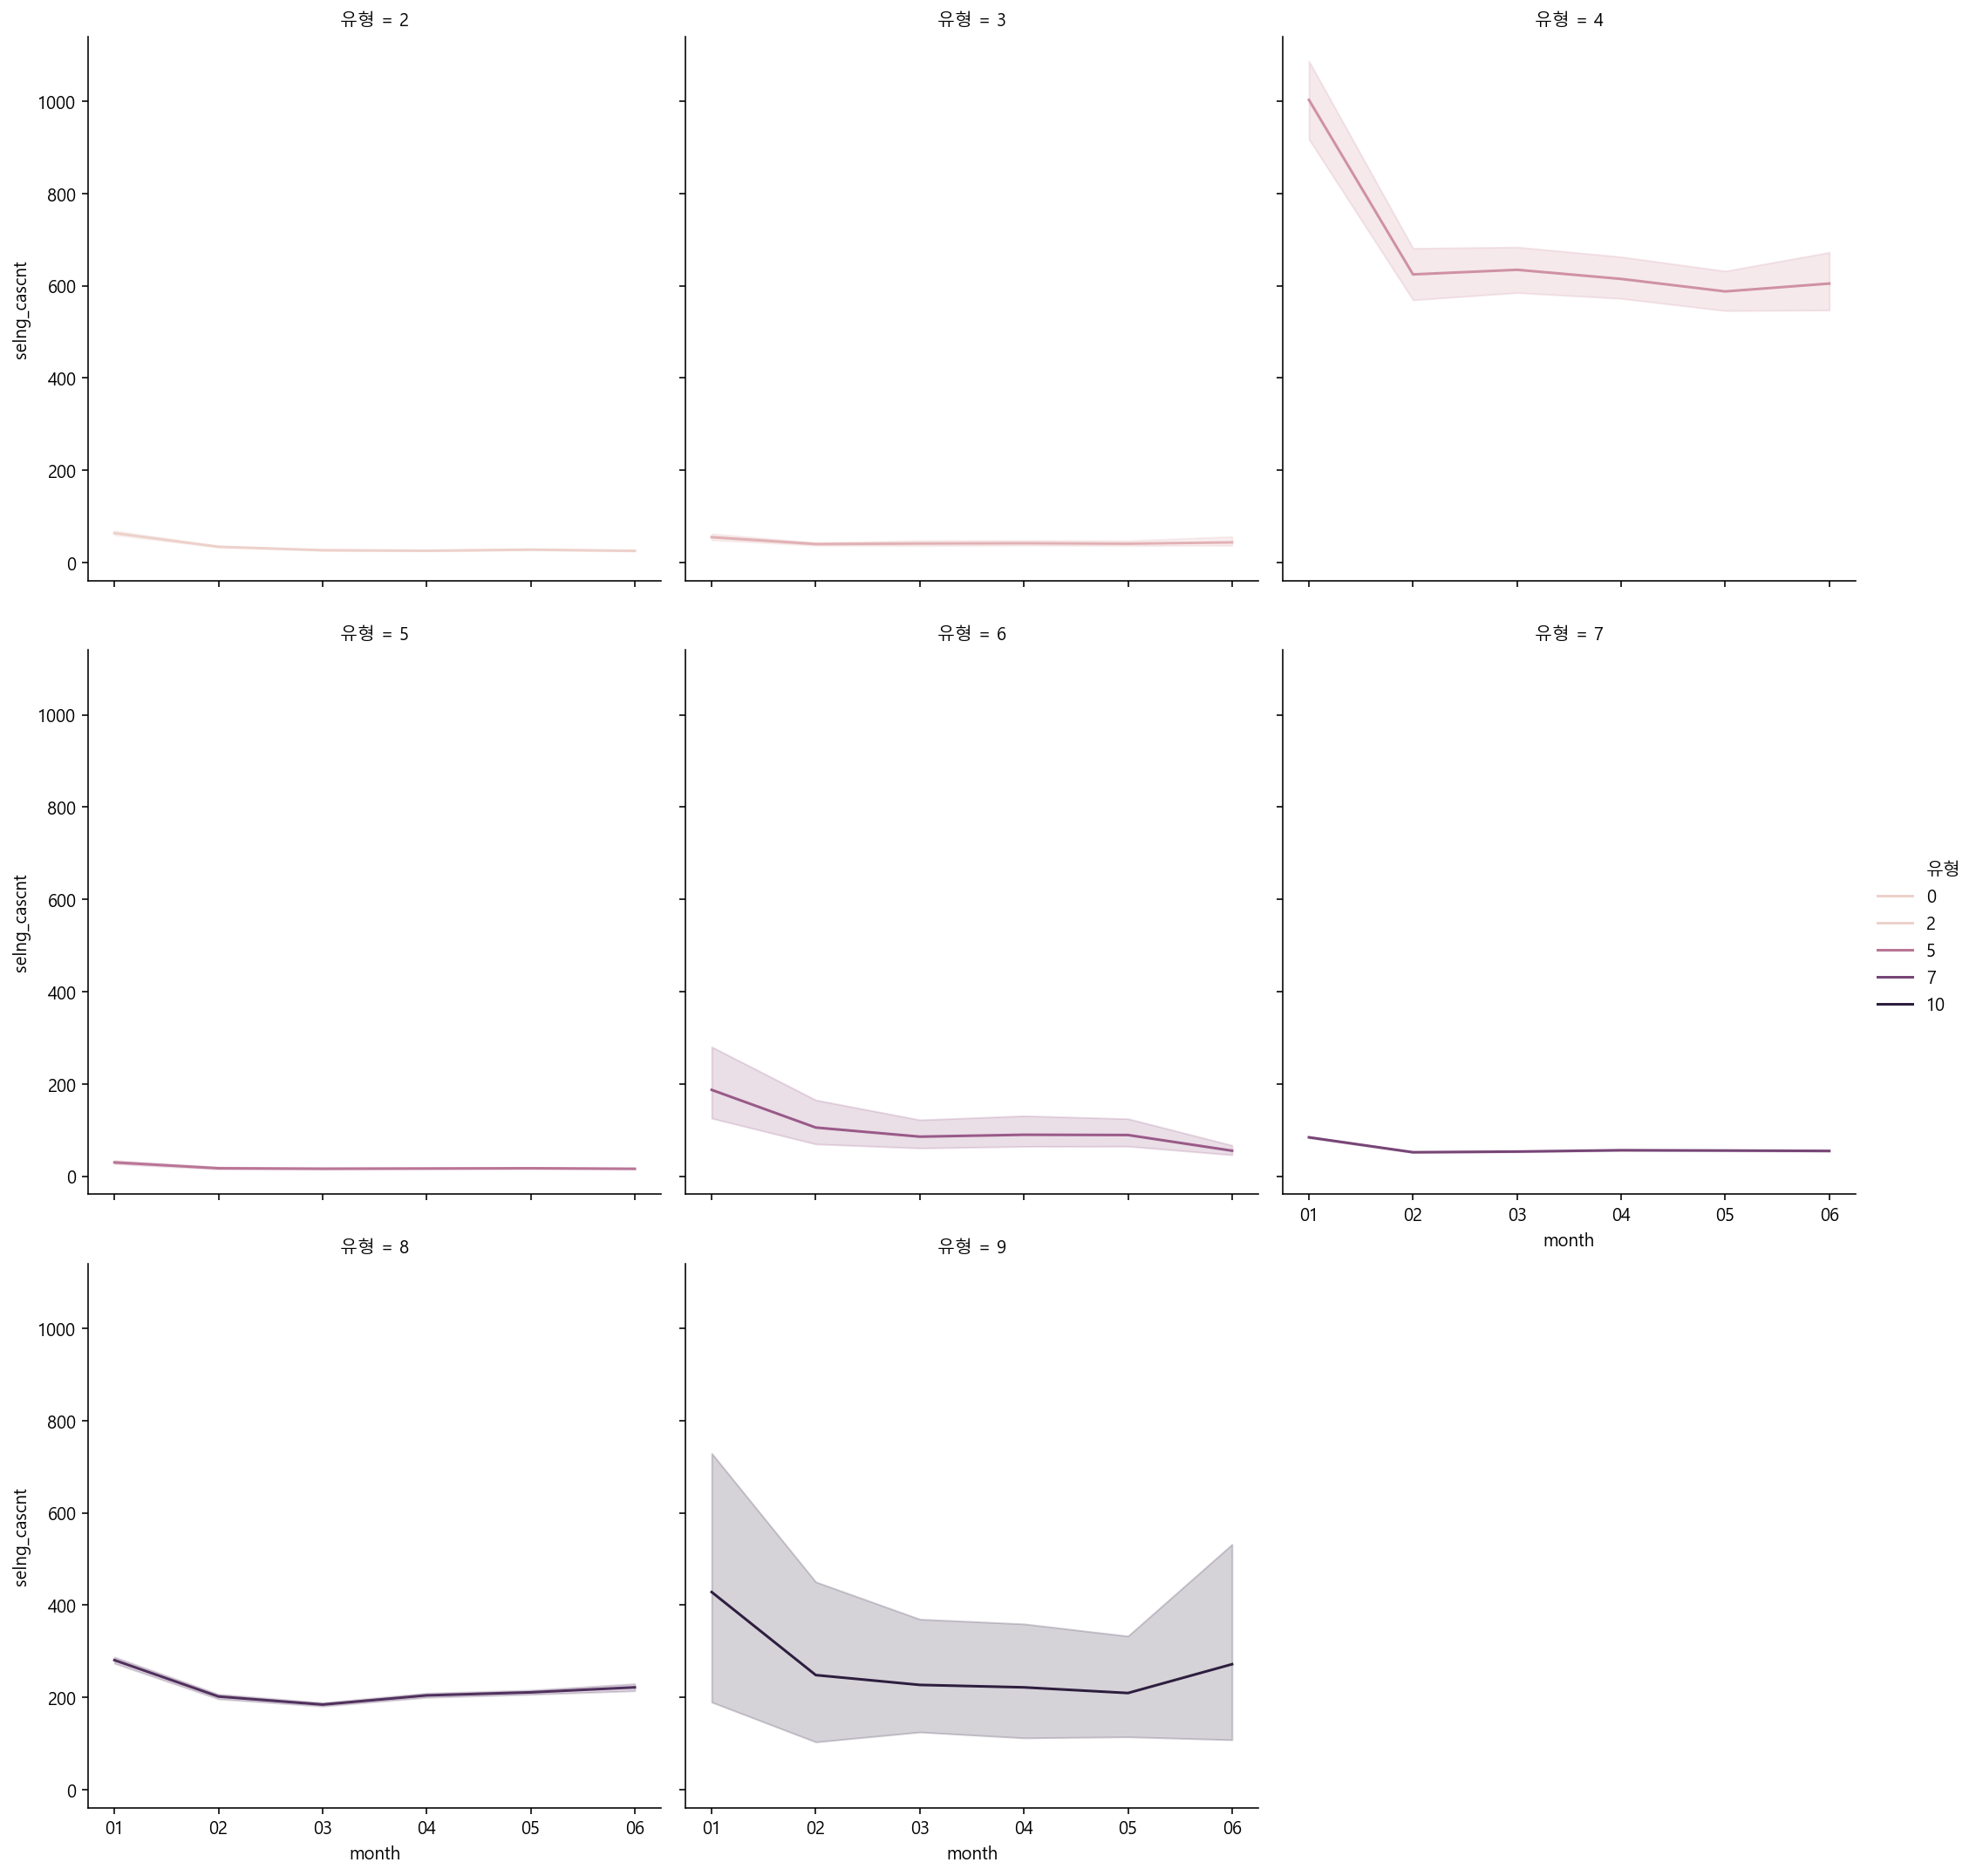

In [44]:
sns.relplot(data=card_sub, x='month', y='selng_cascnt', hue='유형', col='유형', col_wrap=3, kind='line')

In [45]:
# 유형 4와 유형 9의 값이 너무 커서 다른 값들을 제대로 알 수 없음
card_sub_2 = card_sub[~card_sub['유형'].isin(['4', '9'])].copy()

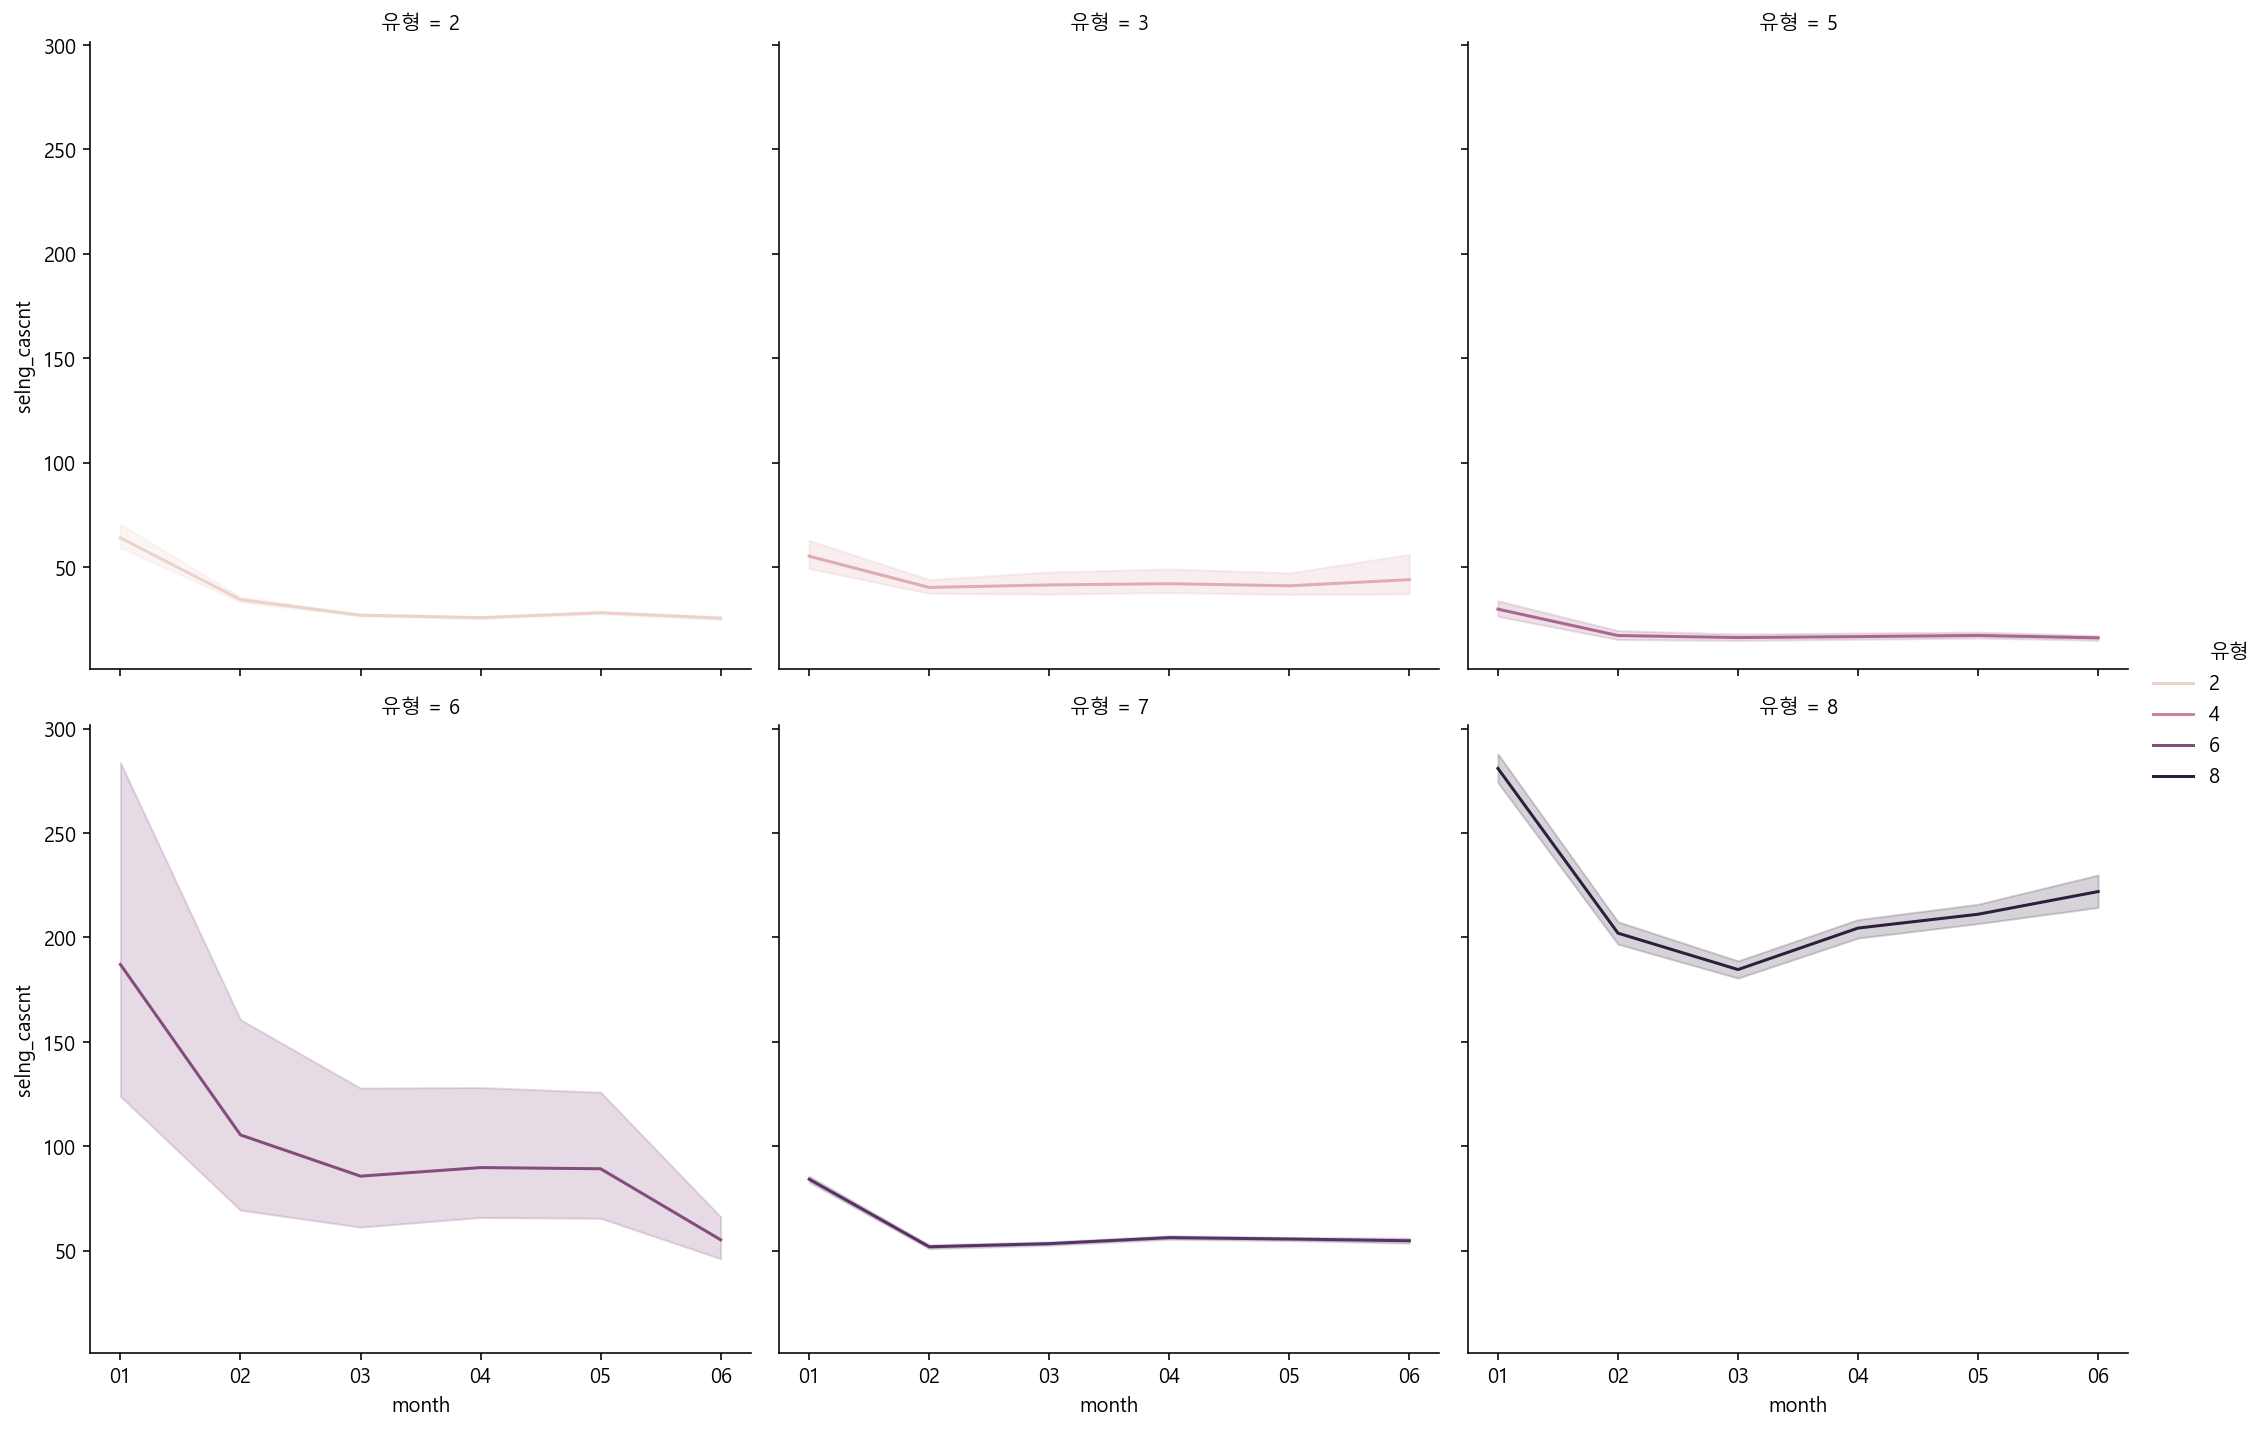

In [46]:
sns.relplot(data=card_sub_2, x='month', y='selng_cascnt', hue='유형', col='유형', col_wrap=3, kind='line')

## 매출액 시각화

In [54]:
# 이상한 데이터 정리
card = card[(card['salamt']!='철물')  & (card['salamt']!='천막')]
card.head()

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,year,month,day,date,유형,new_catm
0,1174066000,성내3동,7041,약국,463,5843230,2020,01,04,2020-01-04,7,NaN
1,1174066000,성내3동,7022,치과의원,33,7835550,2020,01,04,2020-01-04,7,NaN
2,1174066000,성내3동,7021,한의원,53,4589800,2020,01,04,2020-01-04,7,NaN
3,1174066000,성내3동,7020,의원,339,9267240,2020,01,04,2020-01-04,7,NaN
4,1174066000,성내3동,6110,자동차정비,19,4441000,2020,01,04,2020-01-04,6,NaN


In [55]:
card['salamt']=pd.to_numeric(card['salamt'])

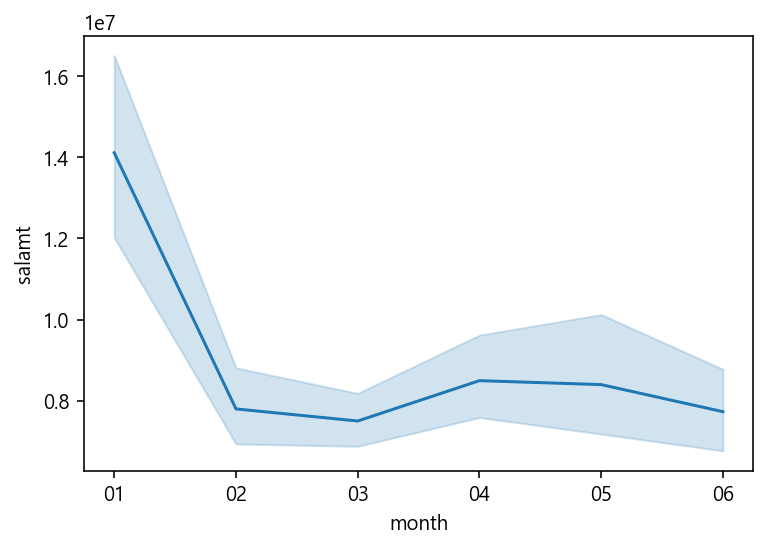

In [56]:
# lineplot 로 그리기
# 1월~6월 동안의 모든 분야의 매출액
sns.lineplot(data= card, x='month', y='salamt')
# 1e7 == 10000000(천만원)

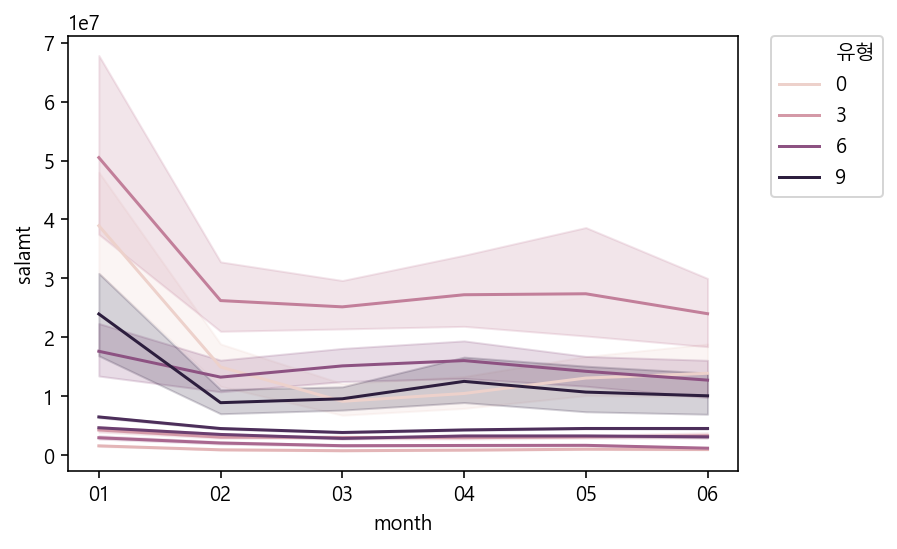

In [57]:
# 군별로 다른 색상 칠하기
sns.lineplot(data=card, x='month', y='salamt', hue='유형')
# legend 값을 바깥쪽으로 하기
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 선은 추정 회귀선, 선 주변에 색으로 표시된 면적이 신뢰구간이다

### 영향을 많이 받은 유형: 1, 4, 6, 9 영향을 거의 받지 않은 유형: 2, 3, 5, 7, 8

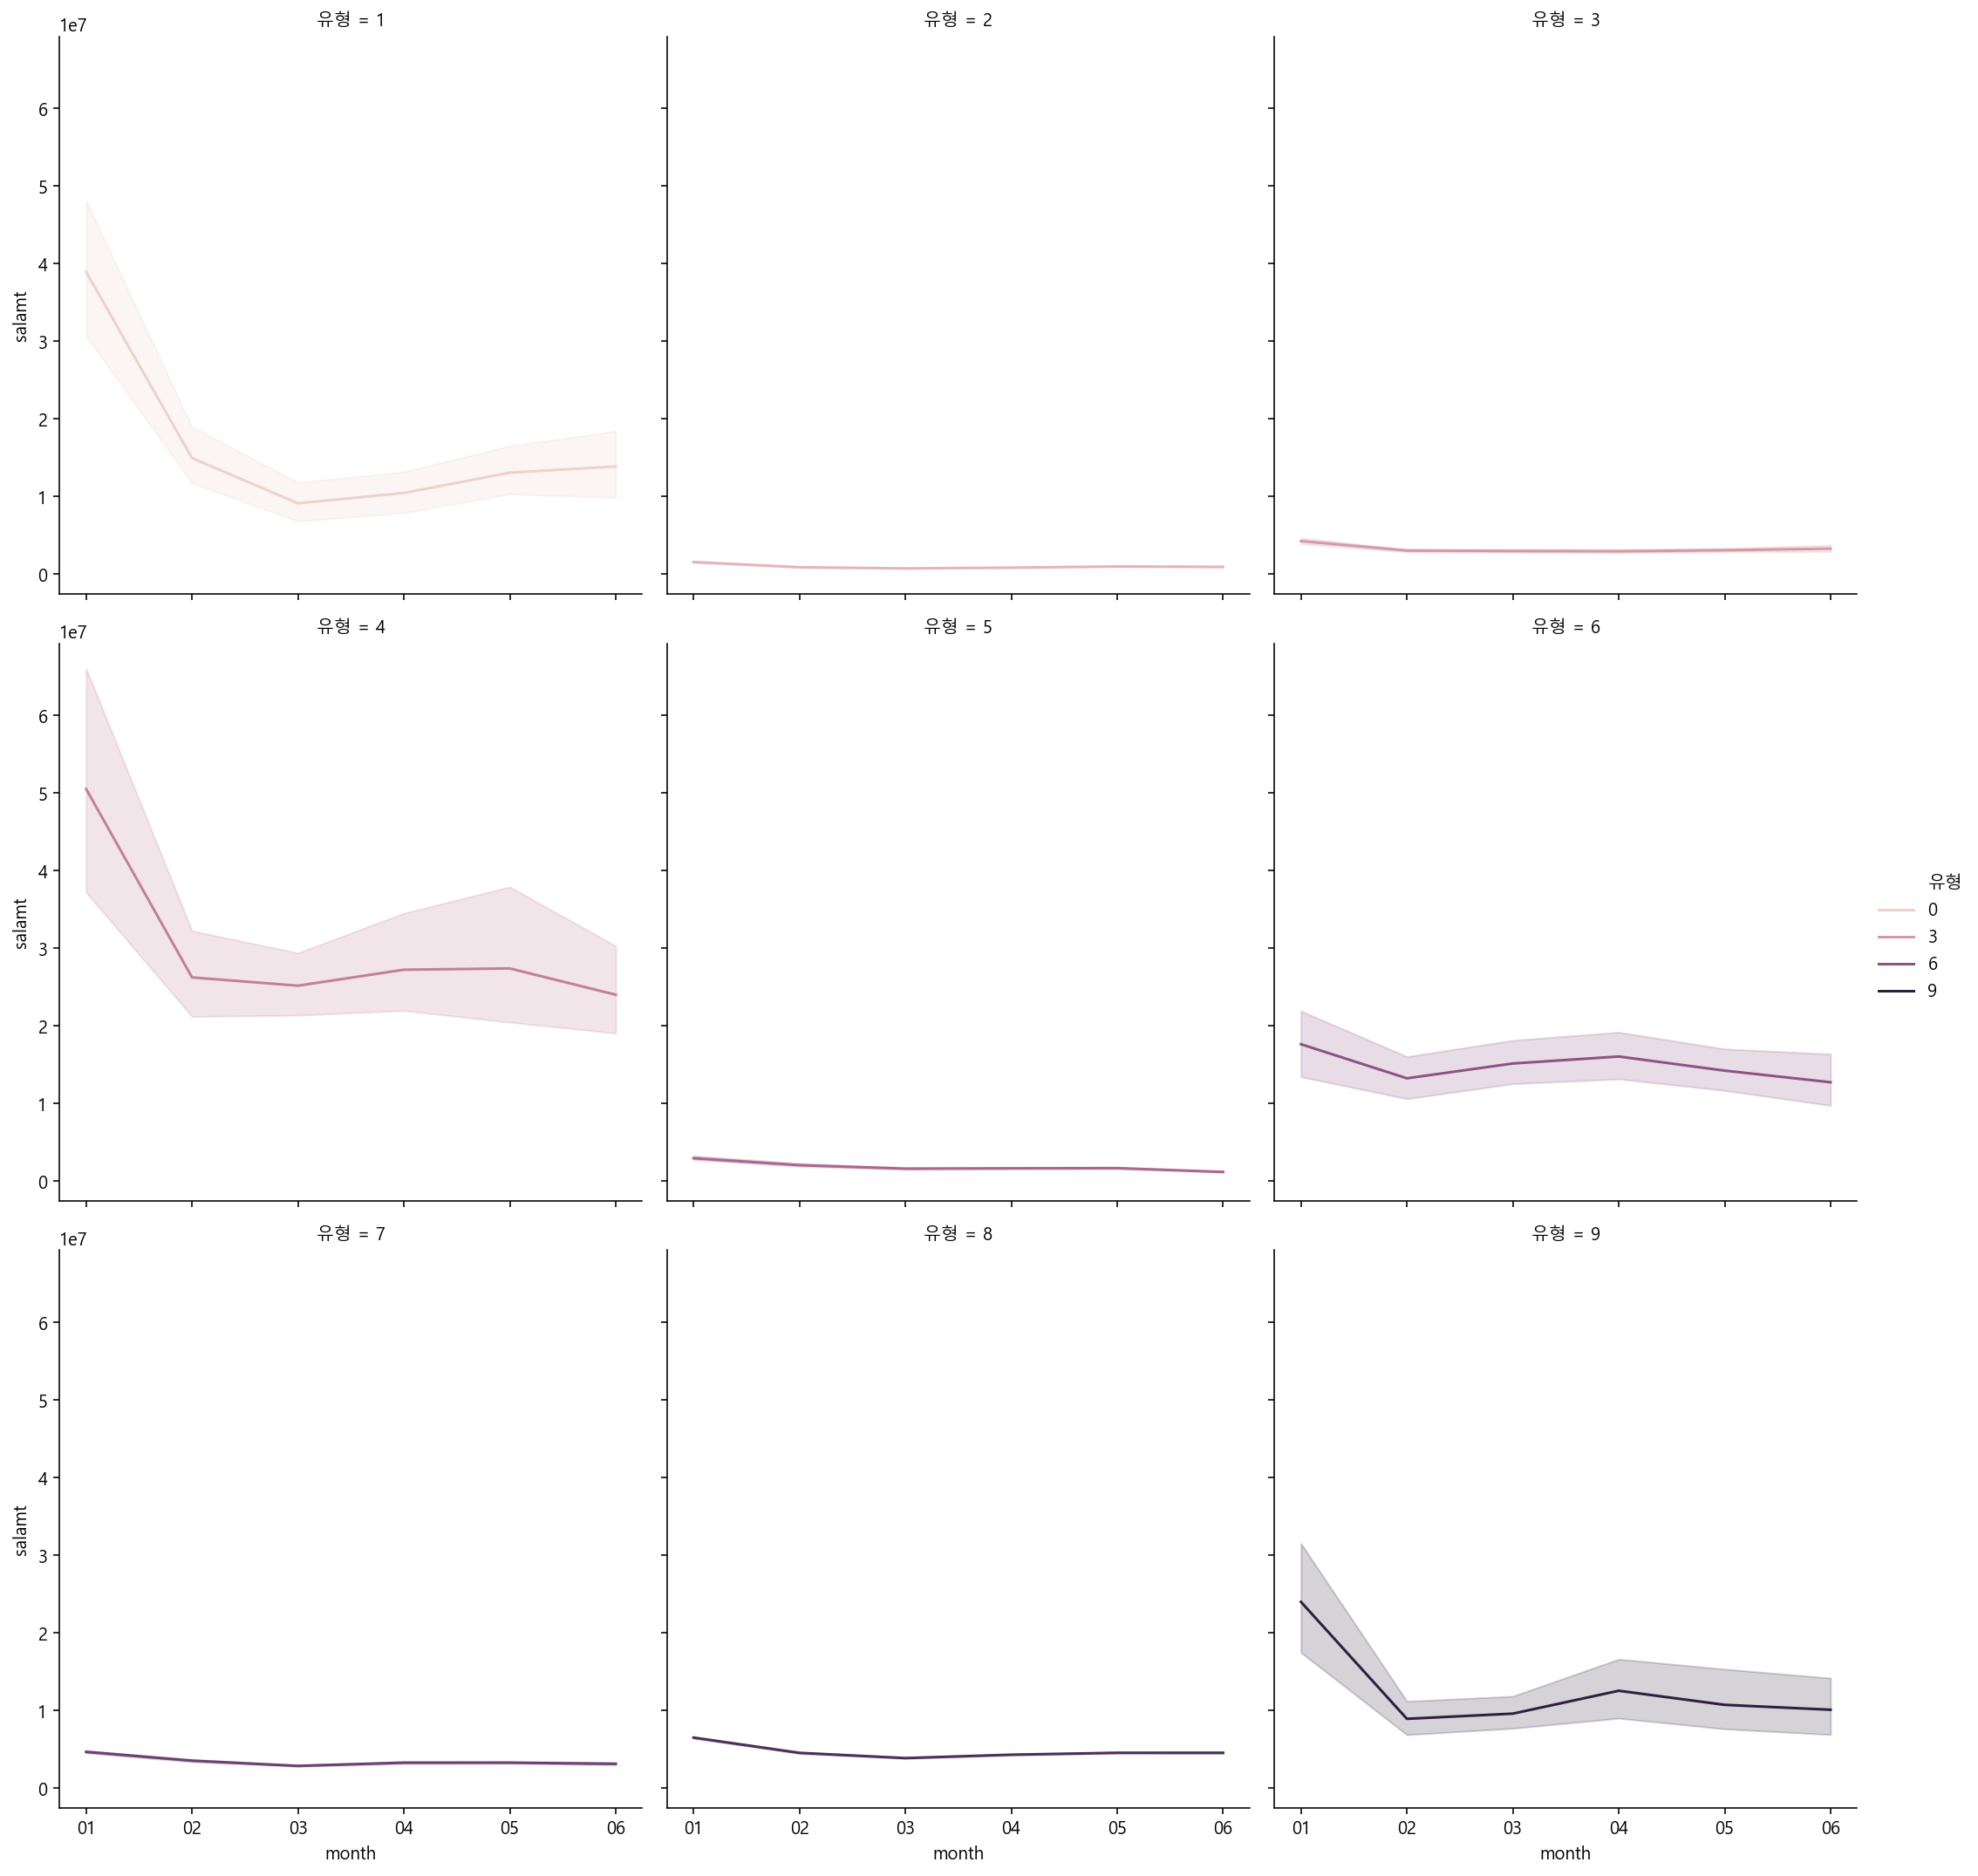

In [58]:
sns.relplot(data=card, x='month', y='salamt', hue='유형', kind='line', col='유형', col_wrap=3)

### 영향을 거의 받지 않은 유형들만 따로 모아서 시각화

In [59]:
# 영향을 거의 받지 않은 유형들만 따로 모아서 시각화
card_sub_3 = card[~card['유형'].isin(['1', '4', '6', '9'])].copy()

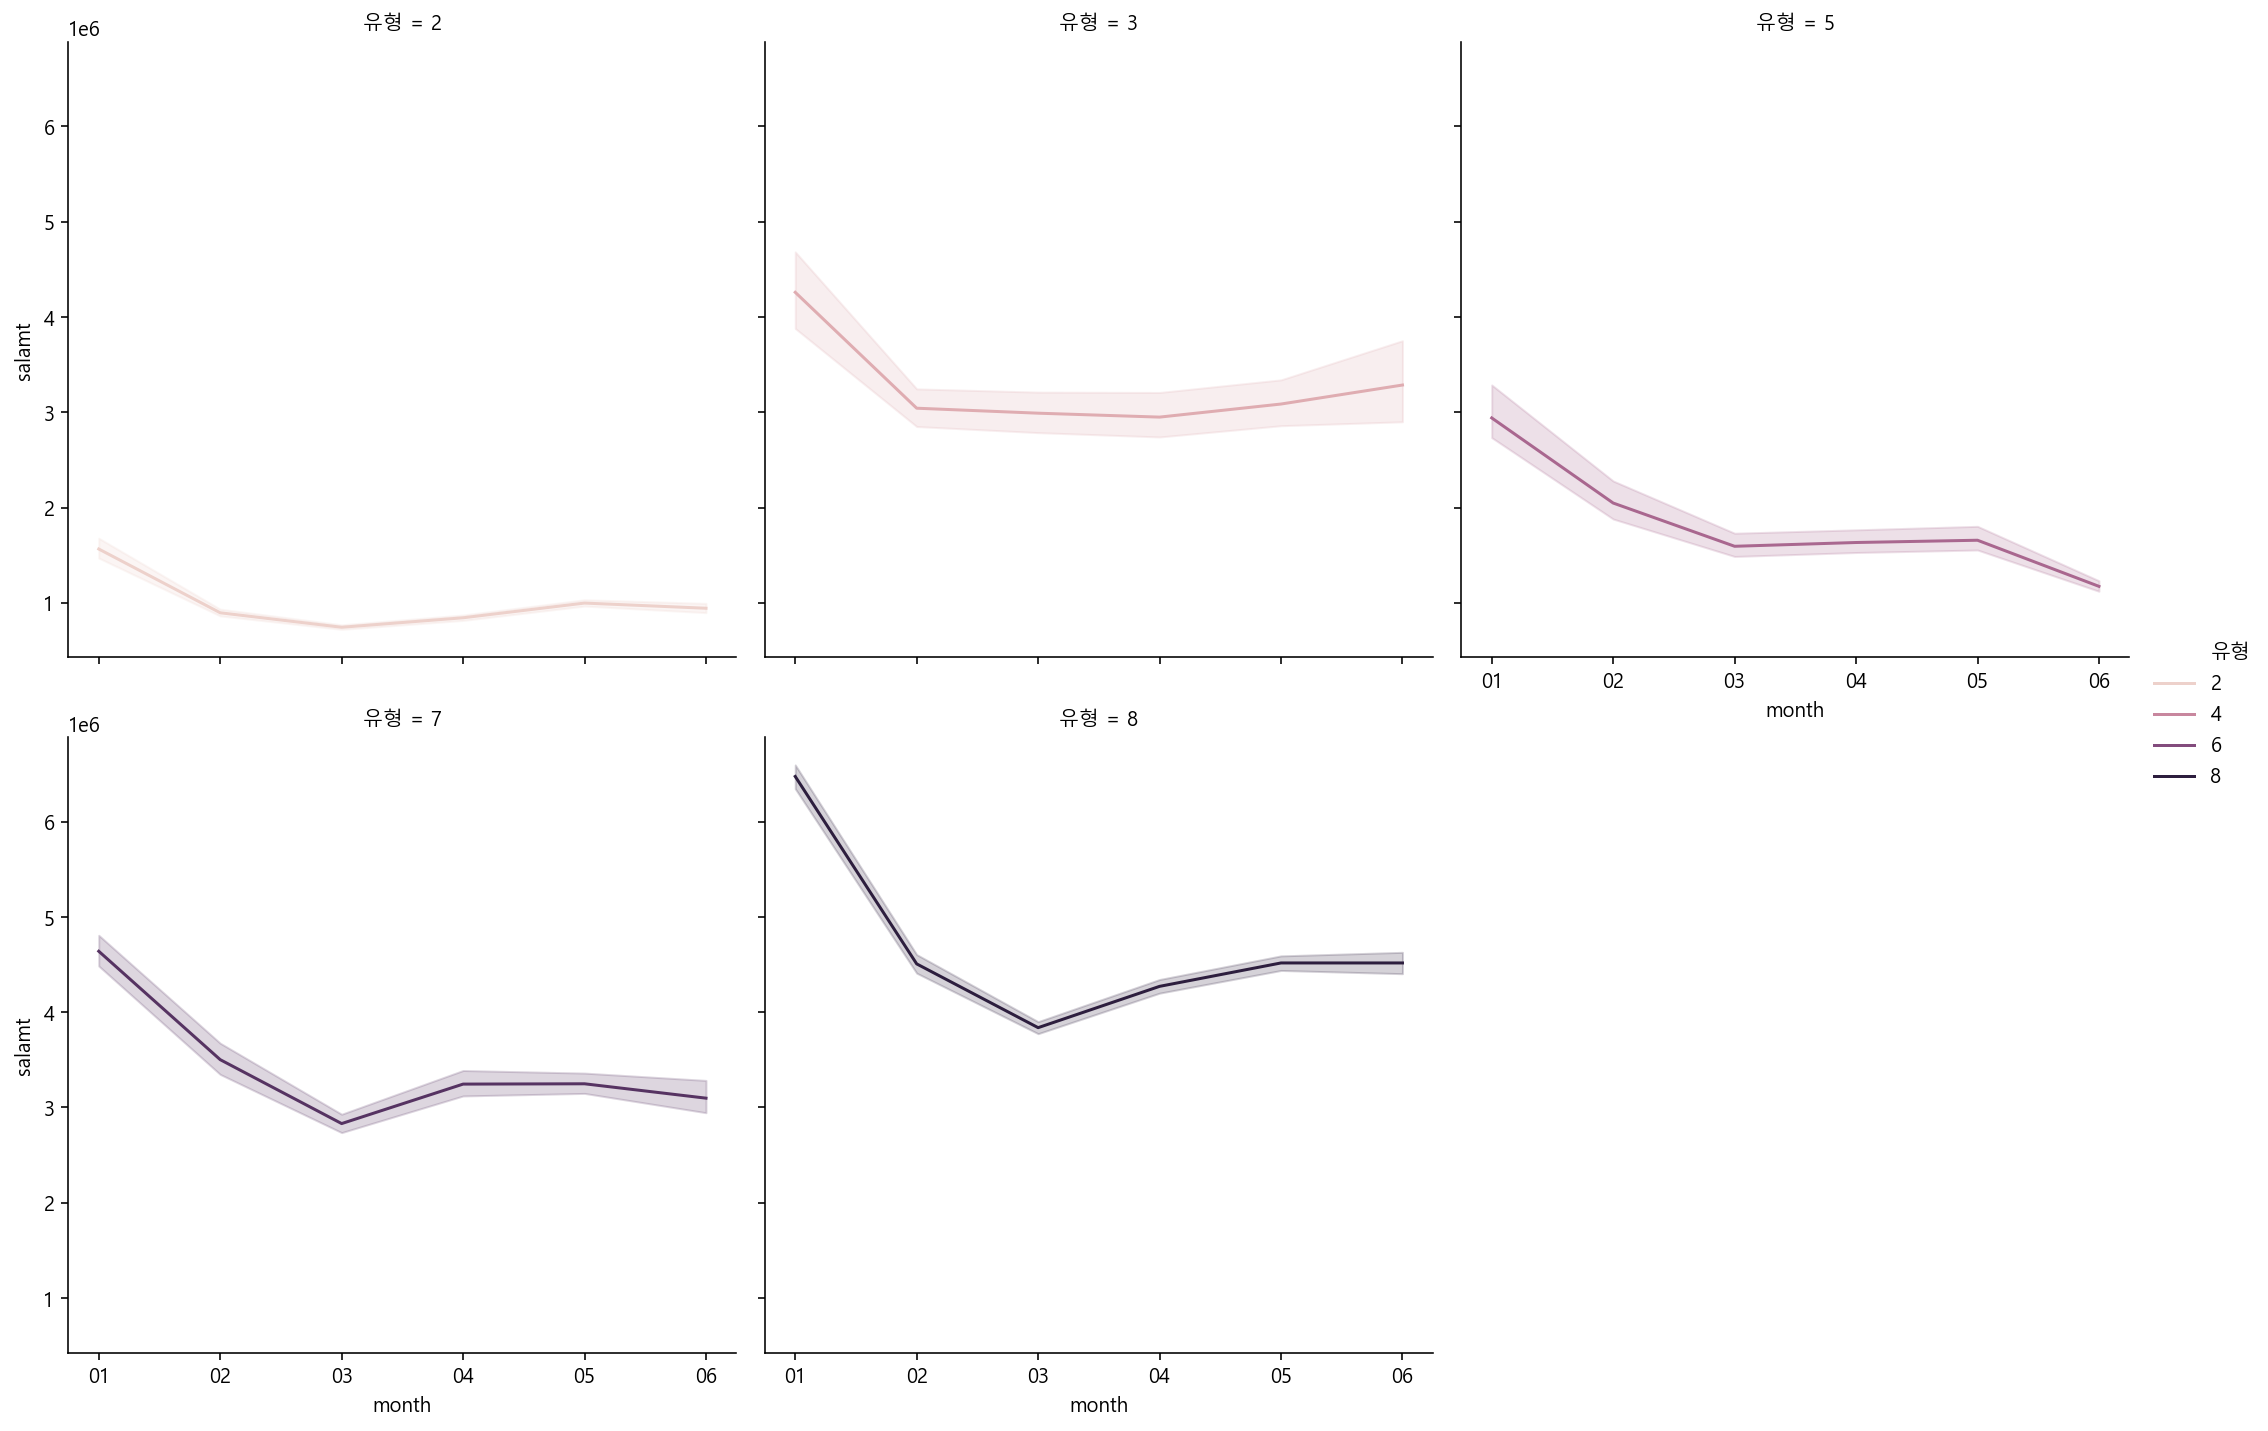

In [60]:
sns.relplot(data=card_sub_3, x='month', y='salamt', hue='유형', col='유형', col_wrap=3, kind='line')

## Accommodation 시각화

### 최근 주변 사람들이 여러 숙박 시설로 놀러 가는 모습을 보고 숙박 시설에 대한 것만 시각화해보고 싶었습니다

In [70]:
card['세부유형']=card['mrhst_induty_cl_code'].str.slice(start=0, stop=2)

card['세부유형'].unique()

array(['70', '61', '51', '50', '42', '40', '21', '20', '99', '90', '83',
       '80', '71', '22', '93', '34', '82', '44', '10', '92', '81', '91',
       '52', '31', '30', '33', '84', '11', '43', '41', '32', '60', '62',
       '95', '96'], dtype=object)

In [71]:
card.head()

,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,year,month,day,date,유형,new_catm,세부유형
0,1174066000,성내3동,7041,약국,463,5843230,2020,01,04,2020-01-04,7,NaN,70
1,1174066000,성내3동,7022,치과의원,33,7835550,2020,01,04,2020-01-04,7,NaN,70
2,1174066000,성내3동,7021,한의원,53,4589800,2020,01,04,2020-01-04,7,NaN,70
3,1174066000,성내3동,7020,의원,339,9267240,2020,01,04,2020-01-04,7,NaN,70
4,1174066000,성내3동,6110,자동차정비,19,4441000,2020,01,04,2020-01-04,6,NaN,61


In [72]:
card_acc = card[card['세부유형'].isin(['10'])].copy()

### 숙박시설의 시각화를 봤을 때 코로나가 정점일때쯤인 3월달에 매출건수와 매출액이 가장 낮고 그 이후 부터 사람들이 제주도, 지방 등 사람이 별로 없는 곳으로 놀러가는 추세 때문인지 숙박시설의 매출건수와 매출액이 증가하는 그래프를 보인다  

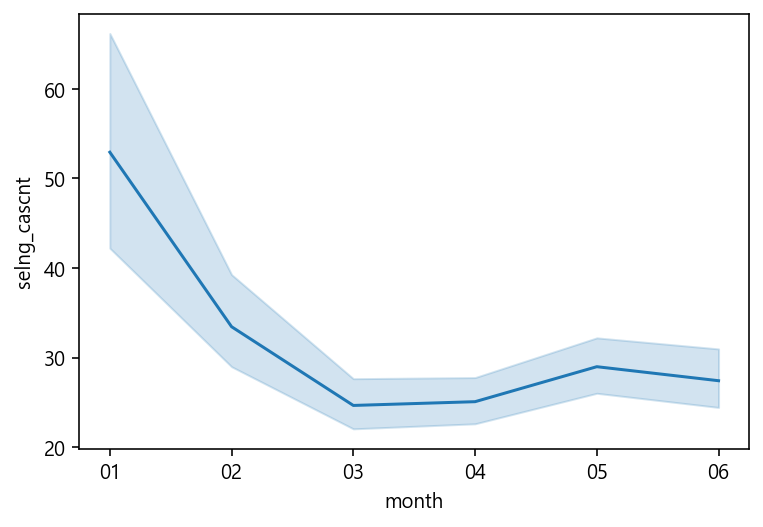

In [73]:
# 숙박시설 매출건수
sns.lineplot(data= card_acc, x='month', y='selng_cascnt')

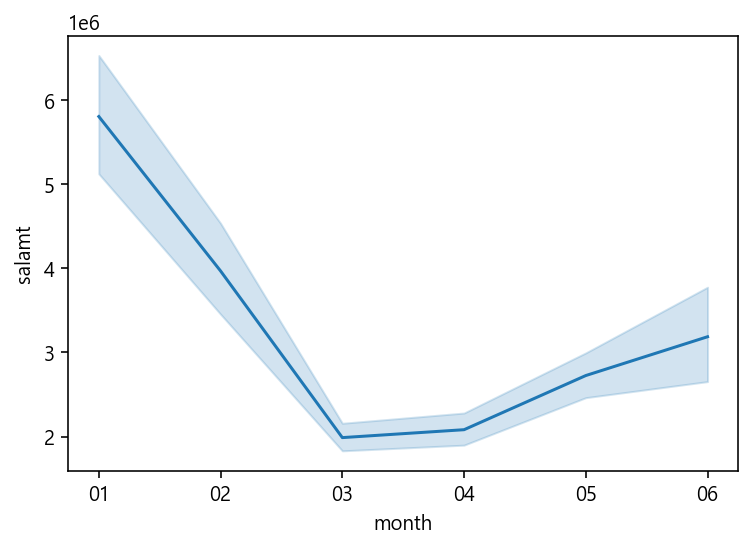

In [74]:
# 숙박시설 매출액
sns.lineplot(data= card_acc, x='month', y='salamt')
# 1e6 == 1000000(백만원)